In [102]:
import datetime

from pprint import pprint
import numpy as np
import pandas as pd
from numba import jit, f8, i8, i4, b1, void

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter import Line
from plotly.graph_objs import Scatter

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [103]:
mat = loadmat('ex5data1.mat')
X = mat['X']
y = mat['y']
Xtest = mat['Xtest']
ytest = mat['ytest']
Xval = mat['Xval']
yval = mat['yval']

X.shape, y.shape, Xtest.shape, ytest.shape, Xval.shape, yval.shape

((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

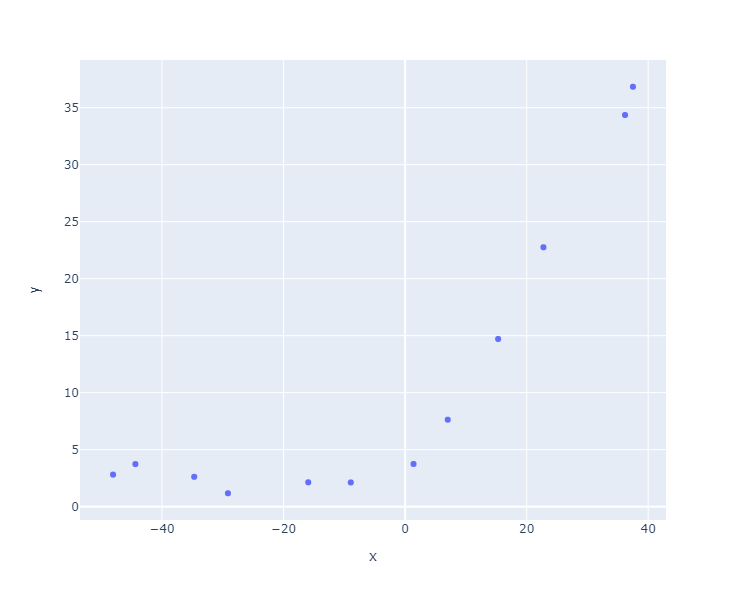

In [104]:
px.scatter(x=X.ravel(), y=y.ravel())

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

reg = Ridge(alpha=0)
reg.fit(X=X, y=y.ravel())

reg.intercept_, reg.coef_, reg

(13.08790351086908,
 array([0.36777923]),
 Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=None, solver='auto', tol=0.001))

[[ 7.22669488]
 [ 2.36604327]
 [26.39766783]
 [26.87675129]
 [-4.58713577]
 [ 9.799421  ]
 [18.71779179]
 [ 0.3236598 ]
 [13.59880563]
 [-3.2355215 ]
 [15.6673239 ]
 [21.45956978]]


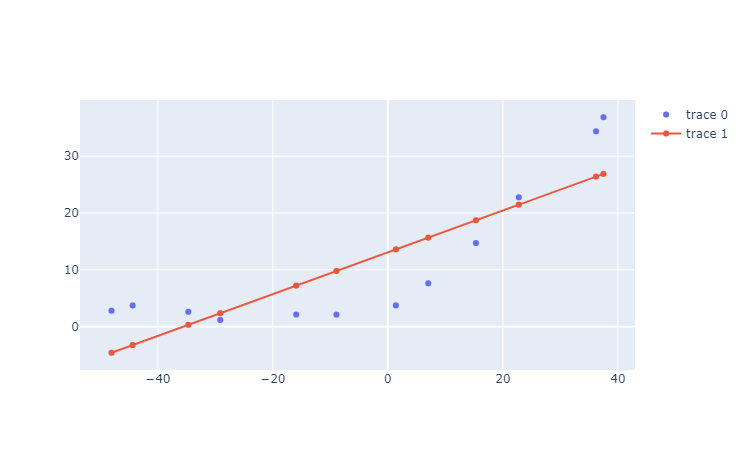

In [106]:
h = reg.coef_ * X + reg.intercept_;
print(h)
fig = go.Figure()
fig.add_trace(Scatter(x=X.ravel(), y=y.ravel(), mode='markers'))
fig.add_trace(Scatter(x=X.ravel(), y=h.ravel()))
fig.show()

(33, 1) (33, 1)
array([1, 2, 4, 6, 8])
array([[       nan,        nan,        nan],
       [1.        , 1.        , 1.        ],
       [0.62090753, 0.98032375, 0.98032375],
       [0.42551049, 0.80456216, 0.84488881],
       [0.5450875 , 0.76222899, 0.81926988]])
array([[-8.65851858e-01, -4.20759318e-01, -8.74832998e-01],
       [-1.03795463e+00, -6.35947312e-02, -4.05540918e-01],
       [ 2.53641723e-01, -2.67608500e+00, -9.19524835e-01],
       [-1.21477086e-04, -1.04332937e+00, -4.48900256e-01],
       [ 3.78835023e-01, -8.66786585e-01, -2.02629853e-01]])


c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



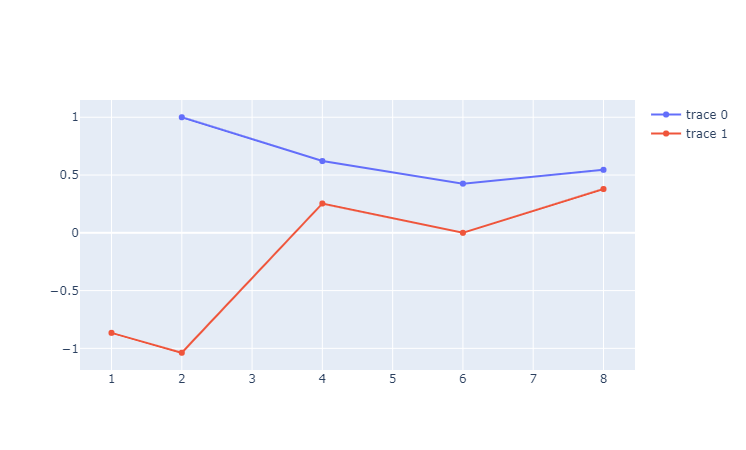

In [136]:
XX = np.r_[X, Xval]
yy = np.r_[y, yval]
print(XX.shape, yy.shape)
  
from sklearn.model_selection import learning_curve
sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=3)

pprint(sizes)
pprint(train_scores)
pprint(test_scores)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()

In [165]:
def poly_feature(x, p):
    X_poly = x
    for i in range(2, p + 1):
        X_poly = np.c_[X_poly, x ** i]
    return X_poly

def feature_normalize(x):
    m = x.shape[0]
    sig = x.std(0)
    u = x.mean(0)
    x_norm = (x - u)/sig
    return x_norm
    
X_poly = poly_feature(XX, 8)
X_norm = feature_normalize(X_poly)
X_norm.shape


(33, 8)

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



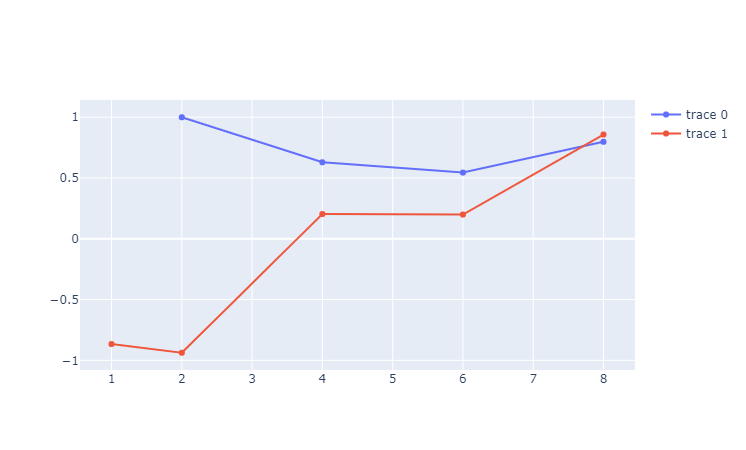

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



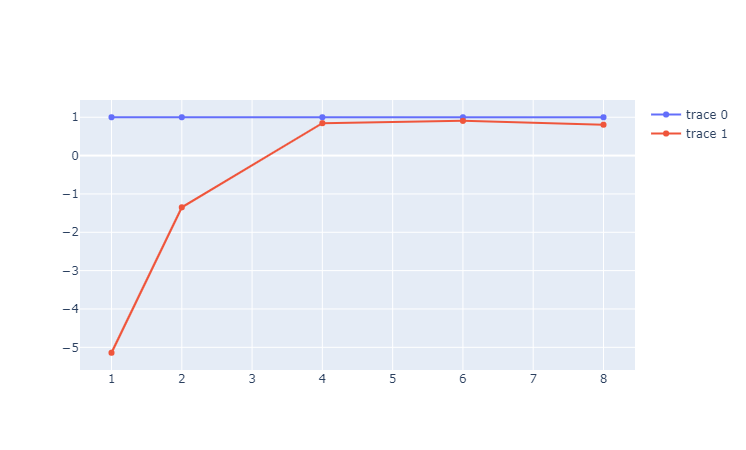

In [176]:
reg = Ridge()
reg.fit(X_poly, y)

from sklearn.model_selection import learning_curve
sizes, train_scores, test_scores = learning_curve(reg, X_poly, y, cv=3)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()

lambda_vec = np.logspace(-6, 4, 20)
train_scores, test_scores = validation_curve(
    regr, X_poly, y, "alpha", lambda_vec)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()